In [4]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [5]:
#Load the data
titanic = pd.read_csv('train.csv')
# titanic bisa diganti" itu variabelnya
#kalo di dalem folder tulis dulu nama foldernya (namaFolder/'train.csv')

# Exploratory Data analysis

In [6]:
titanic.head()
#head --> menampilkan 5 baris pertama

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Overview the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


• Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
• Categorical Features: Survived, Sex, Embarked, Polass
• Alphanumerie Features: Ticket, Cabin

What are the data types for each feature?
• Survived: int
• Polass: int
• Name: string
• Sex: string
• Age: float
• SibSp: int
• Parch: int
• Ticket: string
• Fare: float
• Cabin: string
• Embarked: string

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Getting the percentage of missing values
missing_values = (titanic.isnull().sum()/titanic.shape[0]*100).sort_values(ascending = False)
missing_values

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

Analysis
1. There are a total of 891 passengers in our training set,
2. The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.
3. The Cabin feature is missing approximately 77.1% of is values. Since so much of the feature is missing. it would be hard to fill in the missing values. We'll probably crop these values from our dataset.
4. The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

Univariate Analysis

Out of 891. 62% people died in the accident


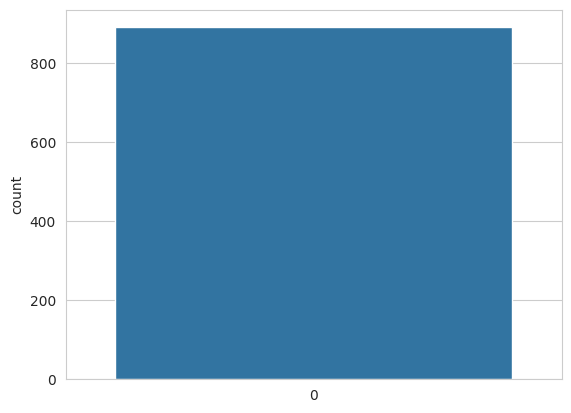

In [10]:
sns.countplot(titanic['Survived']) #cek kolom Survived
death_percentage = round((titanic['Survived'].value_counts().values[0]/891)*100)
print("Out of 891. {}% people died in the accident".format(death_percentage))

male      64.758698
female    35.241302
Name: Sex, dtype: float64


<AxesSubplot: xlabel='Sex', ylabel='count'>

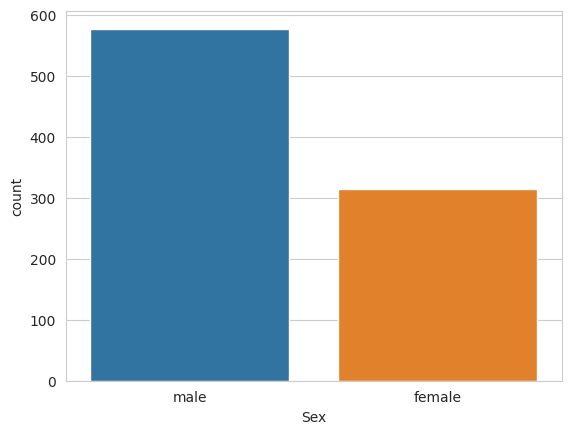

In [12]:
# sex columns
print((titanic['Sex'].value_counts()/891)*100)
sns.countplot(x=titanic['Sex'])

There are almost two times males as much as there were females.
Most of the passenger into this dataset are male: ~35% of the passengers are female, and ~65% are male

In [ ]:
#Number of m

Bivariate analysis

In [ ]:
# Number of men and women in each of the passenger class
titanic.groupby(['Sex', 'Pclass'])['Sex'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64

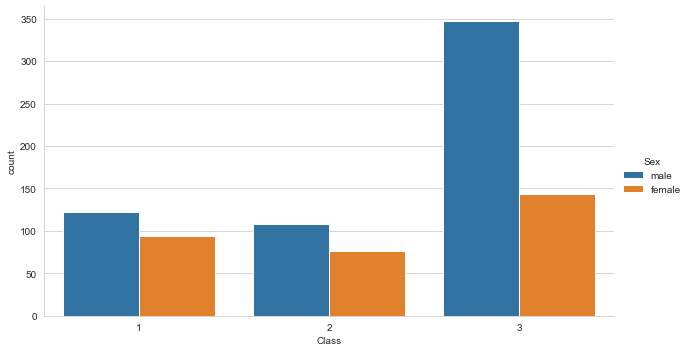

In [ ]:
#Again use seaborn to group by Sex and class
g = sns.factorplot('Pclass', data=titanic, hue='Sex', kind='count', aspect=1.75)
g.set_xlabels('Class')

Multivariate Analysis

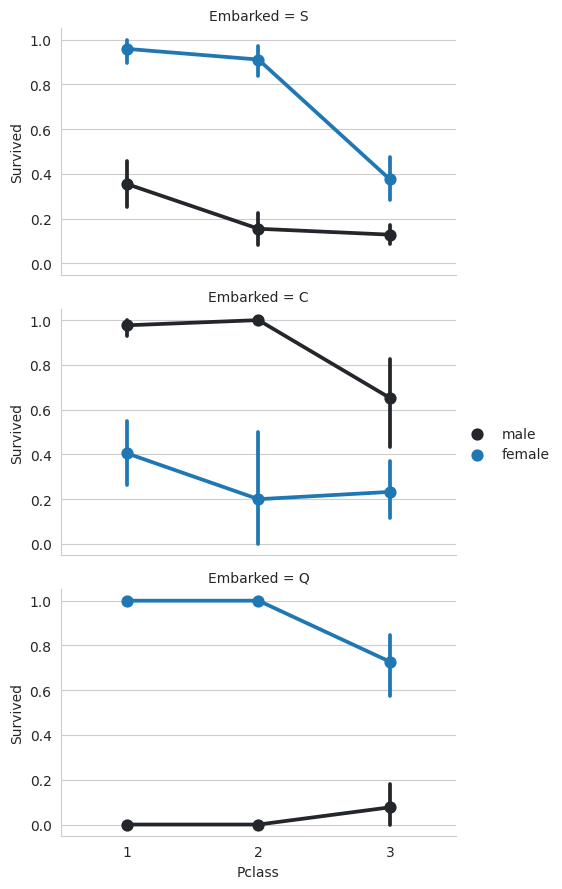

In [15]:
FacetGrid = sns.FacetGrid(titanic, row = 'Embarked', aspect = 1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order = None, hue_order = None)
FacetGrid.add_legend();

Women wil survire more if they embarked from port "Southampton' or Queenstown', While men will survive more from the port 'Cherbourg'. Passengers from port "Southampton" have a low survival rate of 34%, while those from the part "Cherbourg' have a survival rate of 55%. Over 72% of the passengers embarked from the port "Southampton", 18% from the port "Cherbourg and the rest from the port 'Queenstown'

# Data cleaning/ preprocessing

In [ ]:
#axis(0 or 'index', 1 or 'columns'), default 0; whether to drop labels from the
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [ ]:
#Embarked
#Only in titanic, fill the two missing values with the most occurred value, 
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [ ]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

# Feature engineering

In conclusion
There are many things for a greater chance to survive. Being a female or a child will increase your chances. If you have a higher class ticket you have the more chance of surviving than a third class ticket. As for a man, you are more likely to survive if embark in Cherbourg compare to Southampton or Queenstown. If you also travel with 1 or 3 people than 0 or more than 3 your survival chances are greater. The younger you are will also make your survival chance. So it comes down to many things to surivive on the titanic.